#Dataset Download
In this section, the dataset is downloaded from Kaggle using kagglehub for the waste classification project. The dataset path is printed for reference.

In [49]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


#Defining Dataset Paths

In [50]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

# Importing necessary libraries

In [51]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


# Image Loading and Data Preparation

In [53]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data, 'label':y_data})

100%|██████████| 12565/12565 [00:06<00:00, 2080.36it/s]


In [54]:
data.shape

(22564, 2)

# Pie chart for label distribution

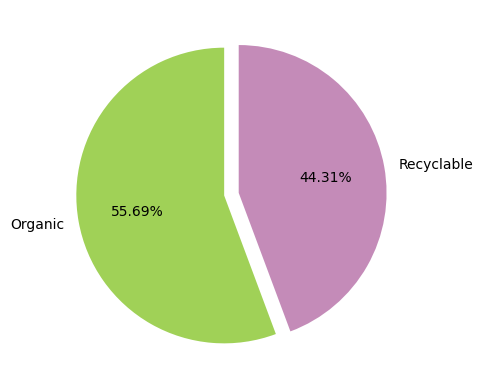

In [55]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()


# Displaying some sample images from the dataset

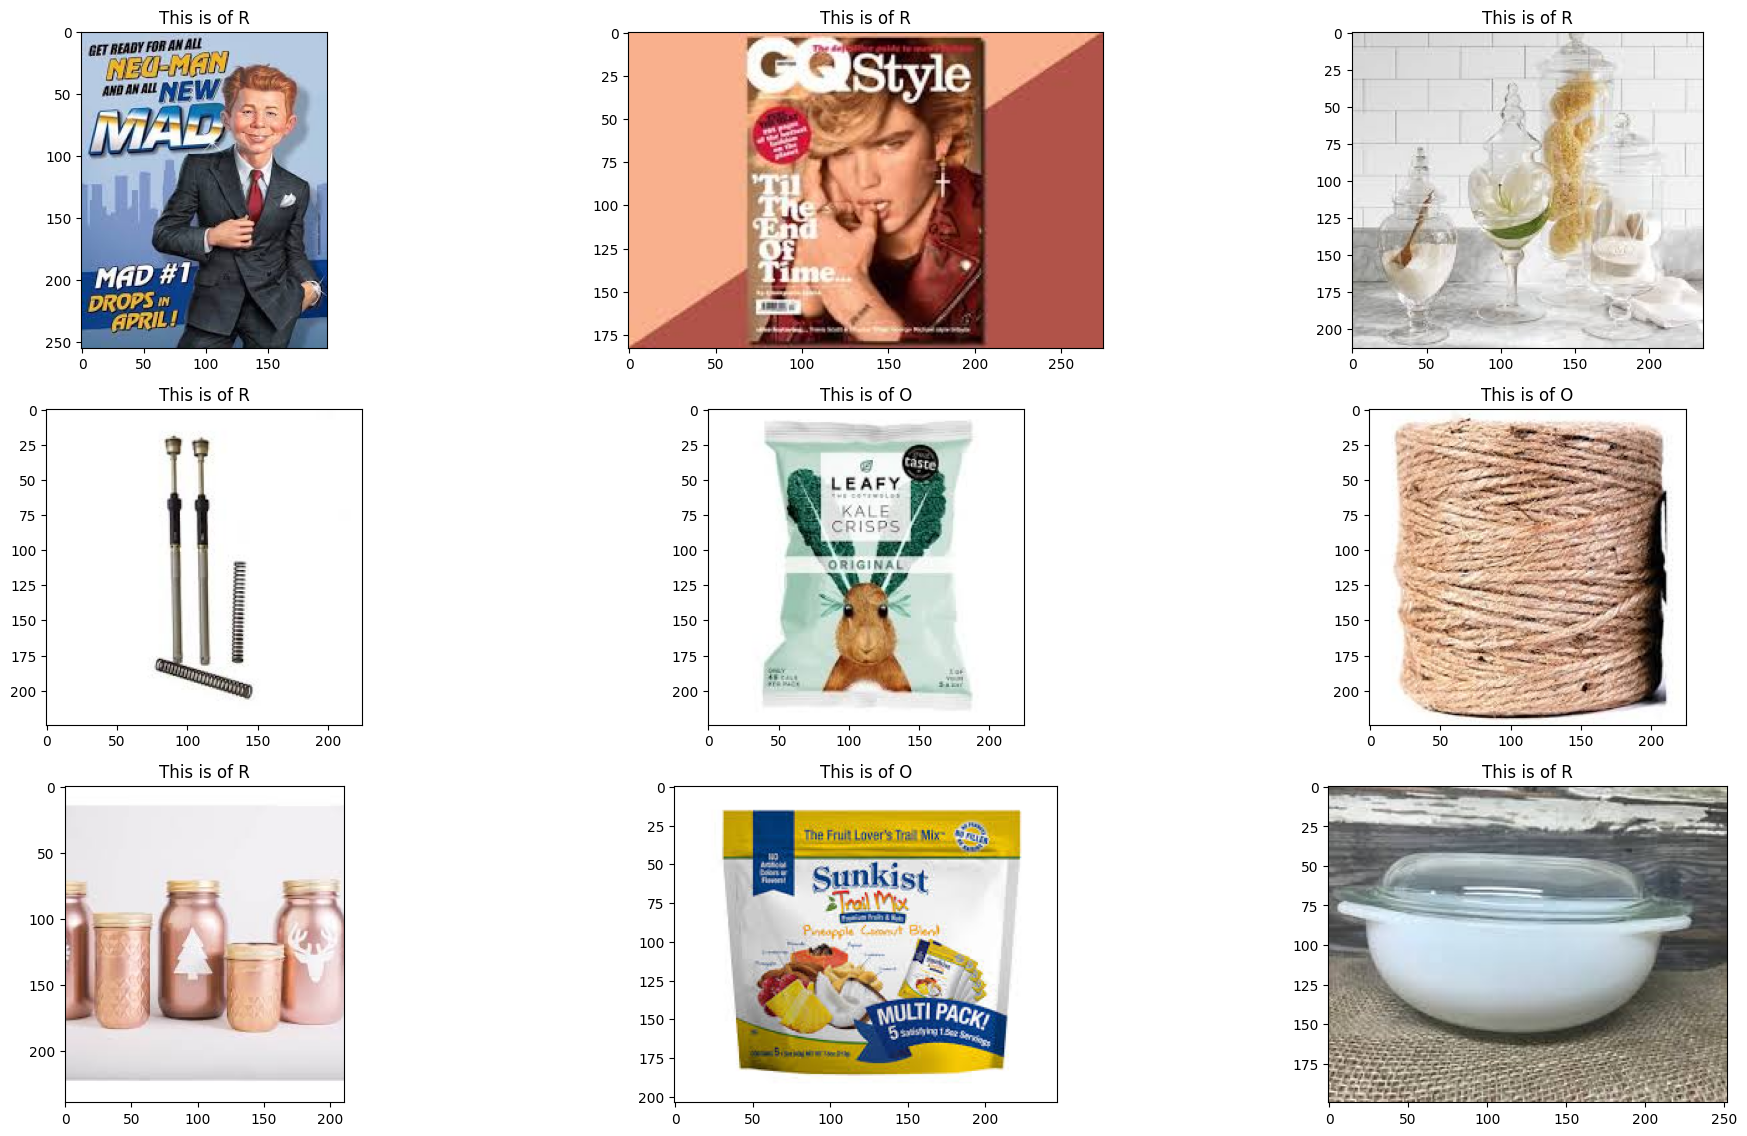

In [56]:

plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

#Model Architecture

  Explanation:
  This section defines the CNN architecture using the Sequential model from Keras. It consists of convolutional layers followed by max-pooling layers, and fully connected layers at the end with dropout for regularization.

In [57]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 64

In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

#Data Augmentation and Image Data Generators

  Data augmentation is applied to the training data using ImageDataGenerator to improve model generalization. We also normalize both the training and testing data using a rescaling factor of 1./255.

In [59]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [60]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# Early Stopping Implementation

    
  The EarlyStopping callback is added to monitor the validation loss during training. It helps to stop training if the validation loss does not improve for a set number of epochs (patience = 20) and restores the best model weights.

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Model Training

    
  The model is trained for 50 epochs using the fit() function, and the early stopping callback is passed to prevent overfitting. The training and validation loss/accuracy can be monitored in real-time.

In [65]:

hist = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=[early_stopping]
)


Epoch 1/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.8189 - loss: 0.4438 - val_accuracy: 0.8846 - val_loss: 0.2992
Epoch 2/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.8424 - loss: 0.3839 - val_accuracy: 0.8790 - val_loss: 0.3045
Epoch 3/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.8611 - loss: 0.3453 - val_accuracy: 0.8603 - val_loss: 0.3258
Epoch 4/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 45s 126ms/step - accuracy: 0.8736 - loss: 0.3148 - val_accuracy: 0.8786 - val_loss: 0.3105
Epoch 5/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.8940 - loss: 0.2754 - val_accuracy: 0.9097 - val_loss: 0.2541
Epoch 6/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9127 - loss: 0.2292 - val_accuracy: 0.9065 - val_loss: 0.3124
Epoch 7/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.9415 - loss: 0.1611 - val_accuracy: 0.9101 - val_loss: 0.3185
Epoch 8/50
353/353 ━━━━━━━━━━━━━━━━━━━━ 81s 144ms/step - accuracy: 0.9582 - loss: 0

#Model Saving

    
  Once training is complete, the trained model is saved to a file to be used later for inference or deployment.

In [66]:
# Saving the model
model.save("plastic_waste_classifier.h5")
print("Training complete!")


Training complete!
